bt를 사용하여 MPAA전략을 재구현 한다.

- 자산군별 평균모멘텀을 사용한 상대모멘텀 n개 선택
- 평균모멘텀스코어 비중과 현금비율을 사용한 현금혼합모멘텀수익곡선을 생성
- 자산군 비중 배분
- 수익곡선 모멘텀 (6개월) 적용

- 포트폴리오 구성 : 주식 (국가 12종목) / 주식(국내 섹터 26종목) / 주식(국내 스마트 베타 30종목) / 채권(장긱 국고채 3종목) / 현금(단기 국고채 1종목)으로 구성


In [1]:
from settings import *

In [2]:
자료 = pd.read_csv("data/mpaa.csv", index_col=0, parse_dates=True)
tickers = {'국가':['S&P 500', '러셀 3000', '니케이 225', '항셍', '홍콩 H', '대만 가권', '상해종합',
                    '영국 FTSE 100', '프랑스 CAC 40', '독일 DAX', 'KOSPI', '인도 SENSEX'],
           '섹터':['에너지', '화학', '금속및광물', '기타 소재', '건설', '기타자본재', '상업서비스',
                    '운송', '자동차및부품', '내구소비재및의류', '소비자서비스', '미디어', '유통',
                    '음식료및담배', '생활용품', '의료', '은행', '보험', '증권', '기타금융',
                    '소프트웨어', '하드웨어', '반도체', '디스플레이', '통신서비스', '유틸리티'],
           '팩터':['블루칩30', '모멘텀', '경기방어주', '고배당주', '베타플러스', 'Low Vol', '배당성장',
                    'Big Vol 지수', 'FnGuide 컨트래리안', 'FnGuide 퀄리티밸류 지수', '대형가치',
                    '대형성장', '대형순수가치', '대형순수성장', '중형가치', '중형성장', '중형순수가치',
                    '중형순수성장', '소형가치', '소형성장', '소형순수가치', '소형순수성장', '중대형가치',
                    '중대형성장', '중대형순수가치', '중대형순수성장', '중소형가치', '중소형순수가치',
                    '중소형성장', '중소형순수성장'],
           '채권':['채권', '20년채권', '채권인버스'],
           '현금':['현금']}
data = 자료.copy()
data

,S&P 500,러셀 3000,니케이 225,항셍,홍콩 H,대만 가권,상해종합,영국 FTSE 100,프랑스 CAC 40,독일 DAX,...,중대형순수가치,중대형순수성장,중소형가치,중소형순수가치,중소형성장,중소형순수성장,채권,20년채권,채권인버스,현금
날짜,,,,,,,,,,,,,,,,,,,,,
2001-01-01,1366.010,749.980,13843.600,16102.400,1588.250,5936.200,2065.610,6297.500,5998.490,6795.140,...,1259.450,1337.140,1232.670,1182.450,1442.170,1417.810,100.000,100.000,100.000,100.000
2001-02-01,1239.940,680.520,12883.500,14787.900,1809.630,5674.690,1959.180,5917.900,5367.480,6208.240,...,1285.730,1213.860,1251.950,1228.120,1408.620,1399.860,100.618,101.236,99.386,100.250
2001-03-01,1160.330,635.670,12999.700,12760.600,1815.180,5797.920,2112.780,5633.700,5180.450,5829.950,...,1116.770,1148.240,1103.510,1100.670,1234.150,1243.210,93.750,87.416,106.666,100.501
2001-04-01,1249.460,686.120,13934.300,13386.000,2062.650,5381.670,2119.180,5966.900,5640.030,6264.510,...,1223.920,1296.200,1160.200,1164.170,1359.520,1343.030,92.021,84.191,108.671,100.752
2001-05-01,1255.820,690.630,13262.100,13174.400,2335.350,5048.860,2214.260,5796.100,5454.190,6123.260,...,1440.350,1311.410,1365.330,1470.430,1478.980,1465.280,96.381,92.169,103.755,101.004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-03-01,2362.720,1401.500,18909.260,24111.590,10273.670,9811.520,3222.510,7322.920,5122.510,12312.870,...,14440.260,2669.700,7866.890,18569.570,1354.780,1217.400,277.909,704.060,35.983,190.261
2017-04-01,2384.200,1414.840,19202.500,24615.130,10219.890,9872.000,3154.660,7203.940,5267.330,12438.010,...,14604.470,2714.200,7940.690,18831.260,1388.560,1274.640,277.717,703.091,36.008,190.382
2017-05-01,2411.800,1426.100,19650.570,25660.650,10602.970,10040.720,3117.180,7519.950,5283.630,12615.060,...,15606.220,2929.060,8430.100,20020.890,1466.880,1342.890,278.185,705.458,35.947,190.790


In [3]:
data = data.rebase(1)

## 설정

- 현금비중
- 자산들
- 자산별 선택 갯수
- 비중 1:1:1:3

In [4]:
CASH_WEIGHTS = 1
ASSETS  =  ['국가', '섹터', '팩터', '채권']
RANKS   = {'국가':4, '섹터':8, '팩터': 10, '채권':1}
WEIGHTS = {'국가':1/6, '섹터':1/6, '팩터':1/6, '채권':3/6}

In [5]:
s = '2001-1-1'
e = '2017-7-1'


START_DATE = '2002-2-1'
START수익곡선6='2002-9-1'

In [6]:
DEBUG = False

if DEBUG:
    e = '2002-2-1'
    data = data[s:e]
    # WEIGHTS = {'국가':1/2, '섹터':0, '팩터':0, '채권':1/2}

def log(s):
    if DEBUG:
        print(s)

class WeighMPAA(bt.Algo):
    def __init__(self, lag, months, cash, cash_weights, assets, rank, weights):
        super(WeighMPAA, self).__init__()
        self.lag = lag
        self.lookback = months
        self.cash = cash
        self.cash_weights = cash_weights
        self.assets = assets #list
        self.rank = rank #dict
        self.weights = weights #dict

    def avearge_momentum(self, t0, prices):
        momentums = 0
        for m in range(1, self.lookback+1):
            start = t0 - pd.DateOffset(months=m)
            prc = prices.loc[start:t0]
            momentum = prc.iloc[-1] / prc.iloc[0]
            momentums += momentum

        return momentums/self.lookback

    def average_momentum_score(self, t0, prices):
        momentums_score = 0
        for m in range(1, self.lookback+1):
            start = t0 - pd.DateOffset(months=m)
            prc = prices.loc[start:t0]
            momentum_score = np.where(prc.calc_total_return() > 0, 1, 0)
            momentums_score += momentum_score

        return pd.Series(momentums_score / self.lookback, index=prices.columns)

    def __call__(self, target):
        # 자산군 + 현금을 넘겨준다.
        selected = target.temp['selected'].copy()

        t0 = target.now - self.lag
        start = t0 - pd.DateOffset(months=self.lookback)
        log(f"{target.now} prc {start} ~ {t0}")
        prc = target.universe.loc[start:t0, selected] # XXX dropna()
        if len(prc) < 1 or prc.isnull().values.any():
            log(f"{target.now} not yet data")
            return False

        log(f"====prc\n{prc}")
        weights = pd.Series()
        for asset in self.assets:
            if self.weights[asset] == 0:
                continue

            n = self.rank[asset]
            평균모멘텀 = self.avearge_momentum(t0, prc[tickers[asset]])
            log(f"@ asset [{asset}]==============\n평균모멘텀\n{평균모멘텀}")

            _selected = list(평균모멘텀.nlargest(n).index)
            # 위와 동일한 결과
            # _selected = list(평균모멘텀.rank(ascending=False).sort_values().head(self.n).index)
            # ---------------------------------
            log(f"@@ _selected {_selected}")

            평균모멘텀스코어 = self.average_momentum_score(t0, prc[_selected])
            log(f"@@@ 평균모먼템스코어\n{평균모멘텀스코어}")
            현금평균모멘텀스코어 = self.average_momentum_score(t0, prc[tickers[self.cash]])
            현금 = 현금평균모멘텀스코어 * self.cash_weights # 현금비중 적용
            # 현금도 평균모멘텀스코어 적용하는게 더 맞을 듯 (좀더 공격적)
            # 현금 = self.CASH_WEIGHTS # 현금비중 적용
            # -------------------------------------------------
            log(f"@@@@ 현금 {현금}")
            #------------------------------------------------------------------

            # 평균모멘텀스코어 현금혼합(현금혼합모멘텀수익곡선)
            cash_weight = 0.0
            asset_weight = pd.Series()
            for k in 평균모멘텀스코어[_selected].keys():
                w = pd.Series([평균모멘텀스코어[k], 현금[self.cash]], index=[k, self.cash])
                log(f"@@@@@ w {w}")
                w1 = w/w.sum() # [k, self.cash]
                weights[k] = asset_weight[k] = w1[k]
                cash_weight += w1[self.cash]
            log(f"@@@@@@============\nasset_weight\n{asset_weight}\ncash_weight {cash_weight}")

            weights[_selected] = asset_weight / n * self.weights[asset] # 비중 1에 맞춤

            # 현금(self.cash) 비중 설정
            # 있으면 기존 값에 더하고 없으면(최초) 그냥 대입
            if self.cash in weights.index:
                weights[self.cash] += cash_weight/n*self.weights[asset]
            else: # 최초
                weights[self.cash]  = cash_weight/n*self.weights[asset]

            log(f"\n@@@@@@@[최종비중]============\nweights\n{weights[_selected]}\n합계 {weights[_selected].sum()+cash_weight/n*self.weights[asset]}\n")

        target.temp['weights'] = weights

        return True

In [7]:
통합모멘텀 = bt.Strategy('통합모멘텀',
    [
        bt.algos.RunMonthly(run_on_first_date=True,
                            run_on_end_of_period=False,
                            run_on_last_date=True),
        # bt.algos.RunAfterDate(START_DATE),
        bt.algos.SelectAll(),
        WeighMPAA(pd.DateOffset(months=1), 12,
                              '현금', CASH_WEIGHTS, ASSETS, RANKS, WEIGHTS),
        PrintTempWeights(),
        bt.algos.Rebalance()
    ],
)

In [8]:
# 수익곡선모멘텀 ==================================================================
class Weigh수익곡선모멘텀(bt.Algo):
    def __init__(self, lag, lookback, cash):
        super(Weigh수익곡선모멘텀, self).__init__()
        self.lag = lag
        self.lookback = lookback
        self.cash = cash

    def average_momentum_score(self, t0, prices):
        momentums_score = 0
        for m in range(1, self.lookback+1):
            start = t0 - pd.DateOffset(months=m)
            prc = prices.loc[start:t0]
            momentum_score = np.where(prc.calc_total_return() > 0, 1, 0)
            momentums_score += momentum_score

        return pd.Series(momentums_score / self.lookback, index=prices.columns)

    def __call__(self, target):
        selected = target.temp['selected'].copy()

        t0 = target.now - self.lag
        start = t0 - pd.DateOffset(months=self.lookback)

        selected.remove(self.cash)
        prc = target.universe[selected].loc[start:t0]#.resample('M').last()
        if len(prc) < 1 or prc.isnull().values.any():
            log(f"{target.now} not yet data")
            return False
        log(f"\nprc : {target.now} {start} ~ {t0}\n{prc}")

        weights = pd.Series(self.average_momentum_score(pd.to_datetime(t0), prc), index=selected)
        weights[self.cash] = 1 - weights.sum()
        log(f"평균모멘텀스코어 {self.average_momentum_score(pd.to_datetime(t0), prc)}")
        target.temp['weights'] = weights

        return True

In [9]:
s6 = bt.Strategy('수익곡선모멘텀6',
    [
        bt.algos.RunMonthly(run_on_first_date=True,
                            run_on_end_of_period=False, # 월초
                            run_on_last_date=False), # 맨 마지막은 리밸런싱안한다. True인 경우 에러 발생
        bt.algos.SelectAll(),
        Weigh수익곡선모멘텀(pd.DateOffset(months=1), 6, '현금'), # lags=0이면 위와 같다.
        PrintTempWeights(),
        bt.algos.Rebalance()
    ],
    children=[통합모멘텀]+tickers['현금']
)

In [10]:
#Exception: Newton Method like root search ..가 발생하면 initial_capital값을 조정해준다.
bt_s6 = bt.Backtest(s6, data, initial_capital=100000.0)
r_6 = bt.run(bt_s6)

2001-02-01 00:00:00 수익곡선모멘텀6 통합모멘텀:0.000 현금:1.000 
2001-03-01 00:00:00 수익곡선모멘텀6 통합모멘텀:0.000 현금:1.000 
2001-04-01 00:00:00 수익곡선모멘텀6 통합모멘텀:0.000 현금:1.000 
2001-05-01 00:00:00 수익곡선모멘텀6 통합모멘텀:0.000 현금:1.000 
2001-06-01 00:00:00 수익곡선모멘텀6 통합모멘텀:0.000 현금:1.000 
2001-07-01 00:00:00 수익곡선모멘텀6 통합모멘텀:0.000 현금:1.000 
2001-08-01 00:00:00 수익곡선모멘텀6 통합모멘텀:0.000 현금:1.000 
2001-09-01 00:00:00 수익곡선모멘텀6 통합모멘텀:0.000 현금:1.000 
2001-10-01 00:00:00 수익곡선모멘텀6 통합모멘텀:0.000 현금:1.000 
2001-11-01 00:00:00 수익곡선모멘텀6 통합모멘텀:0.000 현금:1.000 
2001-12-01 00:00:00 수익곡선모멘텀6 통합모멘텀:0.000 현금:1.000 
2002-01-01 00:00:00 수익곡선모멘텀6 통합모멘텀:0.000 현금:1.000 
2002-02-01 00:00:00 통합모멘텀 KOSPI:0.021 대만 가권:0.020 홍콩 H:0.017 인도 SENSEX:0.012 현금:0.579 유통:0.010 생활용품:0.010 은행:0.010 내구소비재및의류:0.010 보험:0.010 소비자서비스:0.010 운송:0.010 기타 소재:0.010 소형순수가치:0.008 중소형순수가치:0.008 중대형순수가치:0.008 모멘텀:0.008 중형가치:0.008 중형순수가치:0.008 FnGuide 컨트래리안:0.008 Big Vol 지수:0.008 FnGuide 퀄리티밸류 지수:0.008 고배당주:0.008 20년채권:0.184 
2002-02-01 00:00:00 수익곡선모멘텀6 통합모멘텀:0.000 현금:1.000 
2002-

In [11]:
r_6.set_date_range(START수익곡선6)
r_6.display()

Stat                 수익곡선모멘텀6
-------------------  -----------------
Start                2002-09-01
End                  2017-07-01
Risk-free rate       0.00%

Total Return         208.02%
Daily Sharpe         -
Daily Sortino        -
CAGR                 7.88%
Max Drawdown         -5.13%
Calmar Ratio         1.54

MTD                  0.05%
3m                   1.98%
6m                   2.91%
YTD                  2.85%
1Y                   -0.17%
3Y (ann.)            4.65%
5Y (ann.)            5.12%
10Y (ann.)           6.10%
Since Incep. (ann.)  7.88%

Daily Sharpe         -
Daily Sortino        -
Daily Mean (ann.)    -
Daily Vol (ann.)     -
Daily Skew           -
Daily Kurt           -
Best Day             -
Worst Day            -

Monthly Sharpe       1.53
Monthly Sortino      3.75
Monthly Mean (ann.)  7.73%
Monthly Vol (ann.)   5.05%
Monthly Skew         0.80
Monthly Kurt         3.74
Best Month           7.78%
Worst Month          -3.74%

Yearly Sharpe        1.88
Yearly Sorti

In [12]:
bt_통합모멘텀 = bt.Backtest(통합모멘텀, data, initial_capital=10000000.0)
r_all = bt.run(bt_통합모멘텀, bt_s6)

2002-02-01 00:00:00 통합모멘텀 KOSPI:0.021 대만 가권:0.020 홍콩 H:0.017 인도 SENSEX:0.012 현금:0.579 유통:0.010 생활용품:0.010 은행:0.010 내구소비재및의류:0.010 보험:0.010 소비자서비스:0.010 운송:0.010 기타 소재:0.010 소형순수가치:0.008 중소형순수가치:0.008 중대형순수가치:0.008 모멘텀:0.008 중형가치:0.008 중형순수가치:0.008 FnGuide 컨트래리안:0.008 Big Vol 지수:0.008 FnGuide 퀄리티밸류 지수:0.008 고배당주:0.008 20년채권:0.184 
2002-03-01 00:00:00 통합모멘텀 KOSPI:0.021 대만 가권:0.019 인도 SENSEX:0.018 홍콩 H:0.018 현금:0.531 유통:0.010 내구소비재및의류:0.010 운송:0.010 기타 소재:0.010 보험:0.010 생활용품:0.010 은행:0.010 화학:0.010 소형순수가치:0.008 중소형순수가치:0.008 Big Vol 지수:0.008 모멘텀:0.008 중대형순수가치:0.008 중형순수가치:0.008 대형순수가치:0.008 FnGuide 퀄리티밸류 지수:0.008 고배당주:0.008 FnGuide 컨트래리안:0.008 20년채권:0.227 
2002-04-01 00:00:00 통합모멘텀 KOSPI:0.021 대만 가권:0.021 홍콩 H:0.018 인도 SENSEX:0.017 현금:0.590 유통:0.010 내구소비재및의류:0.010 운송:0.010 기타 소재:0.010 보험:0.010 생활용품:0.010 화학:0.010 자동차및부품:0.010 소형순수가치:0.008 중소형순수가치:0.008 대형순수가치:0.008 중대형순수가치:0.008 FnGuide 컨트래리안:0.008 Big Vol 지수:0.008 중형순수가치:0.008 모멘텀:0.008 배당성장:0.008 고배당주:0.008 20년채권:0.167 
2002-05-01 00:00

In [13]:
r_all.set_date_range(START수익곡선6)
r_all.display()

Stat                 통합모멘텀    수익곡선모멘텀6
-------------------  ------------  -----------------
Start                2002-09-01    2002-09-01
End                  2017-07-01    2017-07-01
Risk-free rate       0.00%         0.00%

Total Return         219.87%       208.02%
Daily Sharpe         -             -
Daily Sortino        -             -
CAGR                 8.16%         7.88%
Max Drawdown         -9.73%        -5.13%
Calmar Ratio         0.84          1.54

MTD                  0.05%         0.05%
3m                   2.20%         1.98%
6m                   3.99%         2.91%
YTD                  5.06%         2.85%
1Y                   2.27%         -0.17%
3Y (ann.)            5.51%         4.65%
5Y (ann.)            5.68%         5.12%
10Y (ann.)           5.92%         6.10%
Since Incep. (ann.)  8.16%         7.88%

Daily Sharpe         -             -
Daily Sortino        -             -
Daily Mean (ann.)    -             -
Daily Vol (ann.)     -             -
Daily Skew    

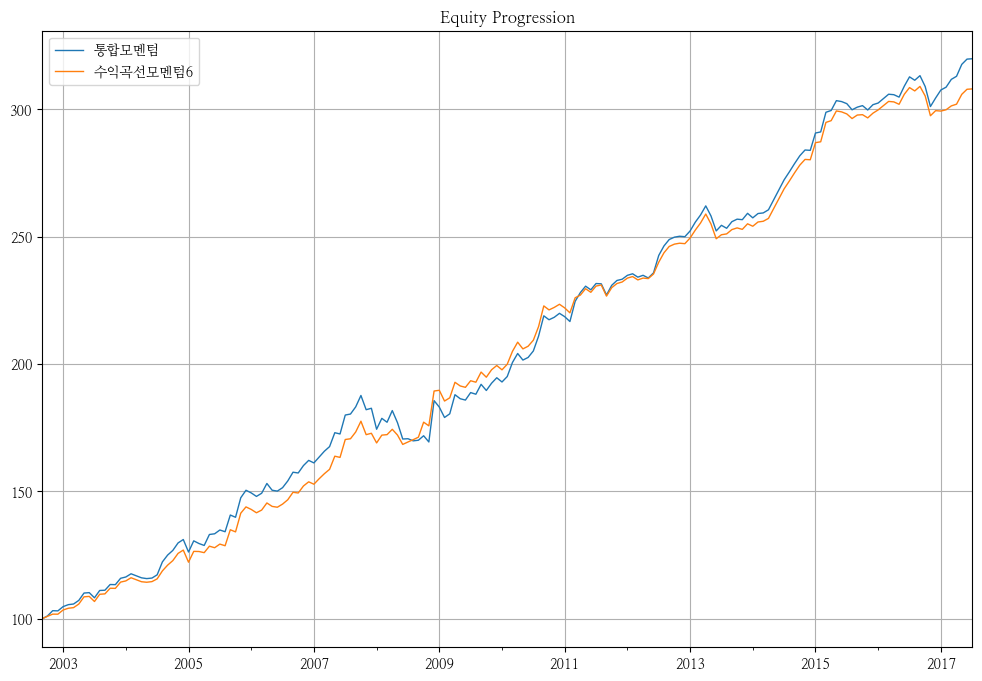

In [14]:
r_all.plot(figsize=(12,8));

          CAGR
통합모멘텀    8.155
수익곡선모멘텀6 7.881
            MDD
통합모멘텀    -9.727
수익곡선모멘텀6 -5.131


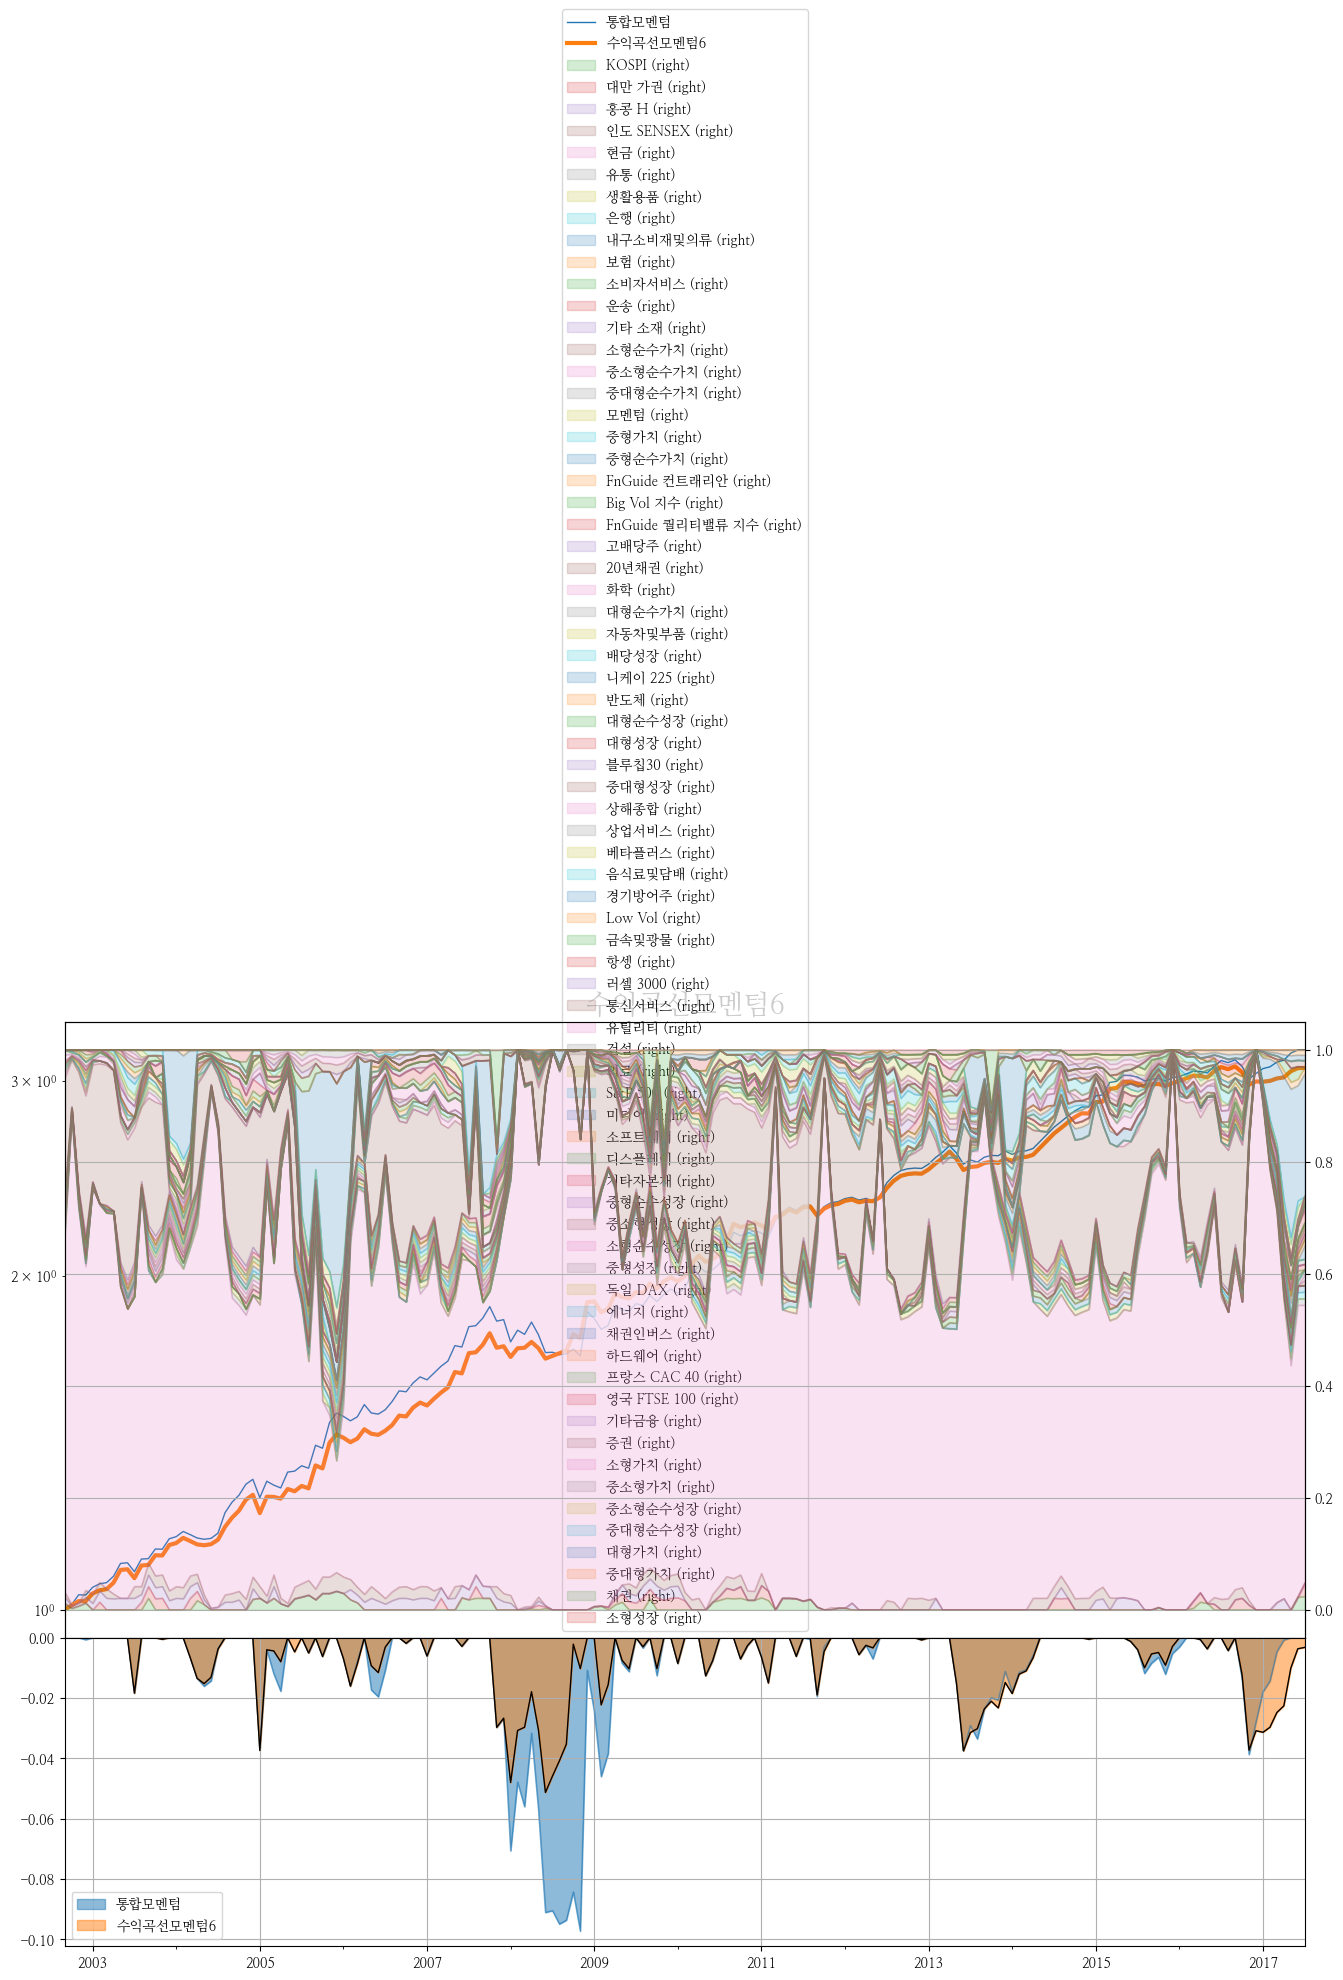

In [15]:
plot_assets(r_all, START수익곡선6, '2017', '수익곡선모멘텀6')